In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt

function definitions

In [2]:
def discretize_q_values(row, col_q_val):
    q_val = row[col_q_val]
    if q_val < 0.01:
        q_val_d = 3
    elif q_val < 0.05:
        q_val_d = 2
    else:
        q_val_d = 1
    return q_val_d

def unknown_essential_xy(df_vis):
    
#     df_vis = selected_data.dropna(subset=['Annotation'])
#     df_vis = df_vis.reset_index(drop=True)

    # NO MORE RANDOMIZATION! Instead this: 
    rv_id_list = []
    x_coords_list = []
    y_coords_list = []
    color_list = []
    scatter_size_list = []
    lw_list = []

    for ann in [1, 2, 3, 4, 5]:
        for qq in [1,2,3]:

            df = df_vis[(df_vis.q_val_D.values == qq) & (df_vis.Annotation.values == ann)]
            # update rv_id list
            rv_id_list.append( list(df.Rv_ID.values) )

            if df.shape[0] < 30:
                scatter_size = 200
                edge_param = 0.40
                lw=4
            elif df.shape[0] < 100:
                scatter_size = 200
                edge_param = 0.40
                lw=3
            elif df.shape[0] < 200:
                scatter_size = 30
                edge_param = 0.45
                lw=2
            elif df.shape[0] < 400:
                scatter_size = 30
                edge_param = 0.45
                lw=2
            else:
                scatter_size = 30
                edge_param = 0.45
                lw=1

            # Update scatter marker size
            scatter_size_list += [scatter_size]*df.shape[0]
            # Update line-width size
            lw_list += [lw]*df.shape[0]

            if ann <=2 and qq >= 2:
                color_temp = '#2b7bba'
            else:
                color_temp = '#585858'

            # update color_list
            color_list+=[color_temp]*df.shape[0]

            # num_sqrs = int(np.ceil(np.sqrt(df.shape[0])))
            num_sqrs = np.max([int(np.ceil(np.sqrt(df.shape[0]))), 10])

            xrange = np.linspace(ann-edge_param, ann+edge_param, num_sqrs)
            yrange = np.linspace(qq+edge_param, qq-edge_param, num_sqrs)

            coords = list(itertools.product(yrange, xrange))
            coords = coords[:df.shape[0]]
            x_coords = [c[1] for c in coords]
            y_coords = [c[0] for c in coords]
            # update coordinates
            x_coords_list += x_coords
            y_coords_list += y_coords
    
    return x_coords_list, y_coords_list, color_list, rv_id_list, scatter_size_list, lw_list

Load annotation scores and q-values:

In [3]:
file_annotation = '../../data/annotations/uniprot_annotation_scores.csv'
df_UNP = pd.read_csv(file_annotation)

file_qval = '../../data/standardized_data/result_qval_matrix_2020_08_27.csv'
df_qval = pd.read_csv(file_qval)

Select a screen. Discretize q-values. Merge with annotation scores: 

In [5]:
col_screen = 'dejesus_H37Rv_day32_vs_dejesus_H37Rv_day0'

df_qval_screen = df_qval[['Rv_ID', col_screen]].copy()
# Discretize q-values: 
df_qval_screen['q_val_D'] = df_qval_screen.apply(discretize_q_values, 1, args=[col_screen])
# Merge with unknowns: 
df_vis = df_qval_screen.merge(df_UNP, on = ['Rv_ID'], how = 'inner')

Call bubble plot function to get coordinates, colors, and sizes: 

In [8]:
x_coords_list, y_coords_list, color_list, rv_id_list, scatter_size_list, lw_list = unknown_essential_xy(df_vis)

Plot:

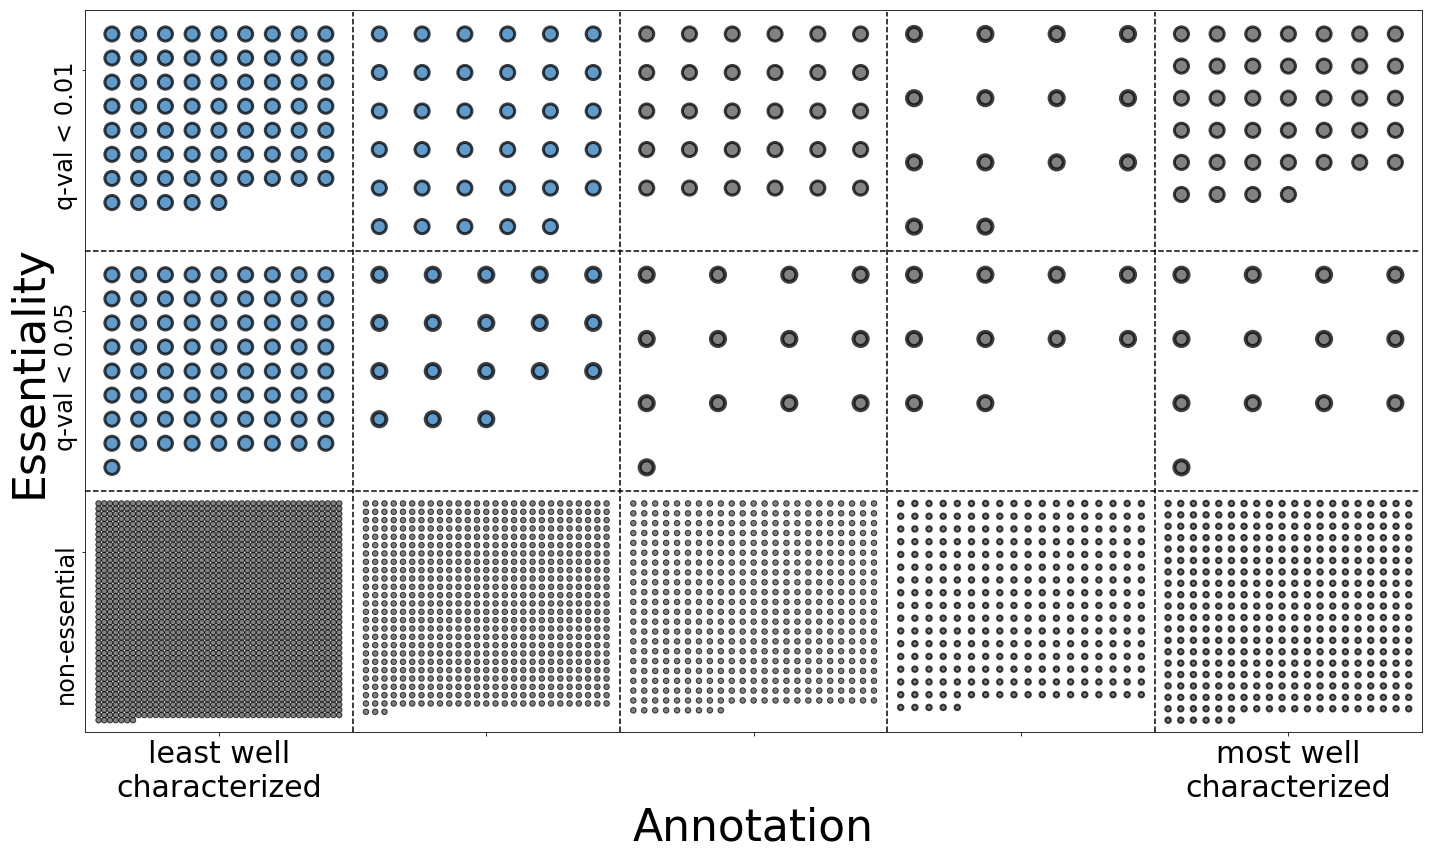

In [7]:
plt.figure(figsize = (20, 12))

for x in np.arange(1.5, 5.5, 1):
    yvals = np.arange(0.5, 3.5, 0.01)
    xvals = len(yvals)*[x]
    plt.plot(xvals, yvals, '--', color = "k")
    
for y in np.arange(1.5, 3.5, 1):
    xvals = np.arange(0.5, 5.5, 0.01)
    yvals = len(xvals)*[y]
    plt.plot(xvals, yvals, '--', color = "k")
    
plt.scatter(x_coords_list, y_coords_list, c = color_list, s = scatter_size_list, edgecolors='k', linewidths=lw_list, alpha = 0.75)

plt.xlabel('Annotation', fontsize = 44)
plt.ylabel('Essentiality', fontsize = 44)
plt.xticks([1, 2, 3, 4, 5], ['least well\ncharacterized','' , '', '', 'most well\ncharacterized'], fontsize = 30)
plt.yticks([1.25, 2.25, 3.25], ['non-essential' ,'q-val < 0.05', 'q-val < 0.01'], fontsize = 24, rotation = 90)
plt.xlim(0.5, 5.5)
plt.ylim(0.5, 3.5)
plt.tight_layout()